In [1]:
from alpaca_test import get_stuff_to_trade, calculate_indicators, get_sentiment
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import configparser
import sys
import os
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ben/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# raw_data, symbol   = get_stuff_to_trade()
raw_data    = os.path.relpath("data/VRSK_test_data_9-20189-9-2019-15min.csv")
symbol = "VRSK"
data = calculate_indicators(raw_data, symbol)
ticker = data["ticker"]
is_bullish = data["is_bullish"]
bullish_pattern = data["bullish_pattern"]

ic = data["data"]

macd = data["macd"]
signal = data["signal"]
macd_buy_sign = data["macd_buy_sign"]
macd_mean = data["macd_10day_mean"]
signal_mean = data["signal_10day_mean"]
macd_pos_momentum = data["macd_pos_momentum"]
macd_signal_pos_momentum = data["macd_signal_pos_momentum"]

mfi = data["mfi"]
mfi_buy_sign = data["mfi_buy_sign"]
mfi_10day_mean = data["mfi_10day_mean"]
mfi_pos_momentum = data["mfi_pos_momentum"]

stoch = data["stoch"]
stoch_buy_sign = data["stoch_buy_sign"]
stoch_10day_mean = data["stoch_10day_mean"]
stoch_pos_momentum = data["stoch_pos_momentum"]

158.39 158.655 158.9


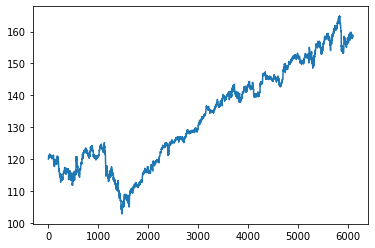

In [3]:
plt.plot(ic["close"])

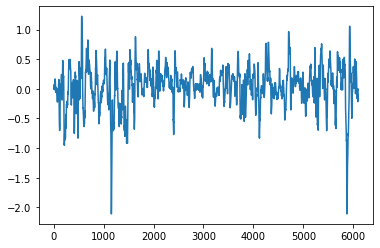

In [4]:
plt.plot(macd)

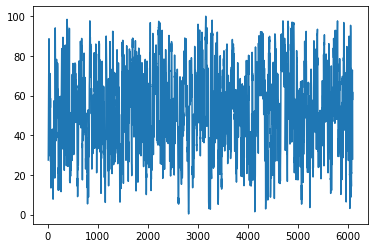

In [5]:
plt.plot(mfi)

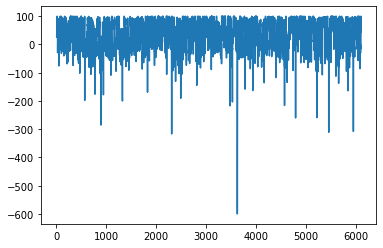

In [6]:
plt.plot(stoch)

In [7]:
macd_mean, signal_mean, macd_buy_sign

(0.0612030164454993, 0.0610233845796425, True)

In [8]:
macd_mean > signal_mean

True

In [9]:
macd_pos_momentum, macd_signal_pos_momentum

(False, True)

In [10]:
mfi_pos_momentum, mfi_buy_sign

(False, False)

6001    0.281760
6002    0.356672
6003    0.371413
6004    0.349214
6005    0.318270
          ...   
6096   -0.107723
6097   -0.060294
6098   -0.016862
6099   -0.002187
6100   -0.011804
Name: MACD, Length: 100, dtype: float64
6001    0.119838
6002    0.167205
6003    0.208047
6004    0.236280
6005    0.252678
          ...   
6096   -0.151091
6097   -0.132931
6098   -0.109718
6099   -0.088211
6100   -0.072930
Name: SIGNAL, Length: 100, dtype: float64


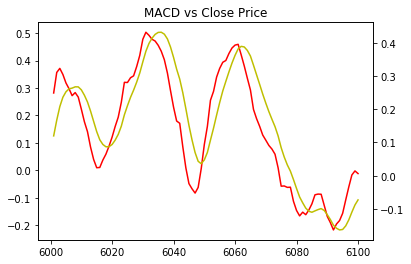

In [18]:
# macd vs close
df1 = macd[-100:]
df2 = signal[-100:]
# df3 = ic[:100]
print(df1)
df1.index = df2.index
print(df2)
# df1.index = df3.index
# print(df3)

fig1, ax1 = plt.subplots()
ax1.plot(df1, 'r-')
ax2 = ax1.twinx()
ax2.plot(df2, 'y-')
# ax3 = ax1.twinx()
# ax3.plot(df3, 'r-')
plt.title('MACD vs Close Price')
plt.show()

6001    0.281760
6002    0.356672
6003    0.371413
6004    0.349214
6005    0.318270
          ...   
6096   -0.107723
6097   -0.060294
6098   -0.016862
6099   -0.002187
6100   -0.011804
Name: MACD, Length: 100, dtype: float64
6001    0.119838
6002    0.167205
6003    0.208047
6004    0.236280
6005    0.252678
          ...   
6096   -0.151091
6097   -0.132931
6098   -0.109718
6099   -0.088211
6100   -0.072930
Name: SIGNAL, Length: 100, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
95    42.052476
96    43.005119
97    39.381479
98    36.704815
99    33.679222
Name: 14 period MFI, Length: 100, dtype: float64


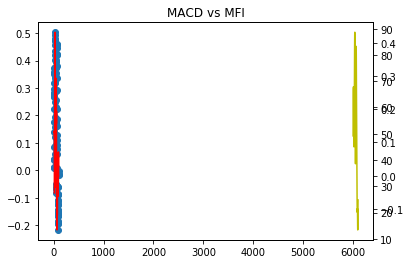

In [19]:
# macd vs mfi
df1 = macd[-100:]
df2 = signal[-100:]
df3 = mfi[:100]
print(df1)
df1.index = df2.index
print(df2)
df1.index = df3.index
print(df3)

fig2, ax1 = plt.subplots()
ax1.plot(df1, 'o-')
ax2 = ax1.twinx()
ax2.plot(df2, 'y-')
ax3 = ax1.twinx()
ax3.plot(df3, 'r-')
plt.title('MACD vs MFI')
plt.show()

6001    0.281760
6002    0.356672
6003    0.371413
6004    0.349214
6005    0.318270
          ...   
6096   -0.107723
6097   -0.060294
6098   -0.016862
6099   -0.002187
6100   -0.011804
Name: MACD, Length: 100, dtype: float64
6001    0.119838
6002    0.167205
6003    0.208047
6004    0.236280
6005    0.252678
          ...   
6096   -0.151091
6097   -0.132931
6098   -0.109718
6099   -0.088211
6100   -0.072930
Name: SIGNAL, Length: 100, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
95    49.264706
96    91.780822
97    78.082192
98    76.712329
99    75.342466
Name: 14 period STOCH %K, Length: 100, dtype: float64


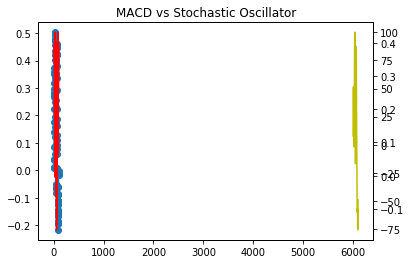

In [20]:
# macd vs stoch
df1 = macd[-100:]
df2 = signal[-100:]
df3 = stoch[:100]
print(df1)
df1.index = df2.index
print(df2)
df1.index = df3.index
print(df3)

fig3, ax1 = plt.subplots()
ax1.plot(df1, 'o-')
ax2 = ax1.twinx()
ax2.plot(df2, 'y-')
ax3 = ax1.twinx()
ax3.plot(df3, 'r-')
plt.title('MACD vs Stochastic Oscillator')
plt.show()

In [15]:
data = get_sentiment(symbol, data)

KeyError: 'sentiment'

In [ ]:
config = configparser.ConfigParser()

try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)
api                     = tradeapi.REST(
    base_url    = config["alpaca"]["APCA_API_BASE_URL"],
    key_id      = config["alpaca"]["APCA_API_KEY_ID"],
    secret_key  = config["alpaca"]["APCA_API_SECRET_KEY"],
    api_version = config["alpaca"]["VERSION"]
)

In [ ]:
# if rsi[0] > 80 and stoc[0] > 80 and macd[0] > 0 and roc[0] > 0:
# 
#     api.submit_order(
#         symbol=symbol,
#         qty=100,
#         side="sell",
#         type="limit",
#         time_in_force="opg",
#         limit_price=limit
#     )
    

In [ ]:
    # Submit a market order to buy 1 share of Apple at market price
    # api.submit_order(
    #     symbol="AAPL",
    #     qty=1,
    #     side="buy",
    #     type="market",
    #     time_in_force="gtc"
    # )

.
